In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
#LOAD DATA
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/weatherHistory.csv'  # Update path
df = pd.read_csv(file_path)
df.sample(100)
#print(df)
#print(df.head(50))
#print(df.head())
#print(df.tail())

Mounted at /content/drive


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
94686,2016-11-25 10:00:00.000 +0100,Mostly Cloudy,rain,4.650000,1.650000,0.84,13.0893,167,8.3398,0,1019.72,Mostly cloudy throughout the day.
24439,2008-11-20 08:00:00.000 +0100,Mostly Cloudy,rain,2.177778,-1.177778,0.80,12.1716,180,9.9015,0,1016.19,Mostly cloudy until afternoon.
81294,2015-02-16 09:00:00.000 +0100,Clear,rain,2.216667,-0.138889,0.79,8.0822,24,5.1359,0,1024.62,Clear throughout the day.
53740,2012-08-25 04:00:00.000 +0200,Clear,rain,19.544444,19.544444,0.61,6.4400,260,15.8263,0,1009.90,Partly cloudy starting in the afternoon contin...
10988,2007-12-09 20:00:00.000 +0100,Foggy,rain,3.933333,1.538889,1.00,9.4185,41,0.6601,0,1003.12,Foggy starting in the morning.
...,...,...,...,...,...,...,...,...,...,...,...,...
57306,2012-06-20 18:00:00.000 +0200,Clear,rain,33.838889,32.755556,0.28,14.4739,160,9.9820,0,0.00,Clear throughout the day.
31092,2009-06-24 12:00:00.000 +0200,Partly Cloudy,rain,22.777778,22.777778,0.53,8.0500,140,11.2700,0,1008.40,Partly cloudy throughout the day.
30100,2009-07-15 04:00:00.000 +0200,Clear,rain,18.333333,18.333333,0.90,3.2200,140,16.1000,0,1018.20,Partly cloudy starting in the morning continui...
69675,2013-09-19 03:00:00.000 +0200,Mostly Cloudy,rain,13.844444,13.844444,0.65,8.1627,269,10.2557,0,1002.72,Mostly cloudy throughout the day and breezy in...


from matplotlib import pyplot as plt
_df_0['Temperature (C)'].plot(kind='hist', bins=20, title='Temperature (C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Apparent Temperature (C)'].plot(kind='hist', bins=20, title='Apparent Temperature (C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Wind Speed (km/h)'].plot(kind='hist', bins=20, title='Wind Speed (km/h)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Precip Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Temperature (C)', y='Apparent Temperature (C)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Apparent Temperature (C)', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Humidity', y='Wind Speed (km/h)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Wind Speed (km/h)', y='Wind Bearing (degrees)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Formatted Date']
  ys = series['Temperature (C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Formatted Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Summary')):
  _plot_series(series, series_name, i)
  fig.legend(title='Summary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Formatted Date')
_ = plt.ylabel('Temperature (C)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Formatted Date']
  ys = series['Temperature (C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Formatted Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Precip Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Precip Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Formatted Date')
_ = plt.ylabel('Temperature (C)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Formatted Date']
  ys = series['Apparent Temperature (C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Formatted Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Summary')):
  _plot_series(series, series_name, i)
  fig.legend(title='Summary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Formatted Date')
_ = plt.ylabel('Apparent Temperature (C)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Formatted Date']
  ys = series['Apparent Temperature (C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Formatted Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Precip Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Precip Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Formatted Date')
_ = plt.ylabel('Apparent Temperature (C)')

from matplotlib import pyplot as plt
_df_14['Temperature (C)'].plot(kind='line', figsize=(8, 4), title='Temperature (C)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Apparent Temperature (C)'].plot(kind='line', figsize=(8, 4), title='Apparent Temperature (C)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Humidity'].plot(kind='line', figsize=(8, 4), title='Humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Wind Speed (km/h)'].plot(kind='line', figsize=(8, 4), title='Wind Speed (km/h)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Precip Type'].value_counts()
    for x_label, grp in _df_18.groupby('Summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Summary')
_ = plt.ylabel('Precip Type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Summary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Temperature (C)', y='Summary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Precip Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Temperature (C)', y='Precip Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Summary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Apparent Temperature (C)', y='Summary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Precip Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Apparent Temperature (C)', y='Precip Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
#DATA CLEANING
df = df.dropna(subset=["Summary"])  # Drop missing target rows

# Features and label
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
X = df[features]
y = df['Summary']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [5]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

#Summery Output
print(f"Training Sample:{len(X_train)}")
print(f"Testing sample:{len(X_test)}")

Training Sample:77162
Testing sample:19291


In [6]:
#BUILD MODEL
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#TRAIN MODEL
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=128)

Epoch 1/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3836 - loss: 1.6952 - val_accuracy: 0.4423 - val_loss: 1.2775
Epoch 2/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4414 - loss: 1.2971 - val_accuracy: 0.4492 - val_loss: 1.2557
Epoch 3/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4466 - loss: 1.2693 - val_accuracy: 0.4538 - val_loss: 1.2410
Epoch 4/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4479 - loss: 1.2570 - val_accuracy: 0.4558 - val_loss: 1.2347
Epoch 5/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4507 - loss: 1.2542 - val_accuracy: 0.4564 - val_loss: 1.2306
Epoch 6/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4562 - loss: 1.2433 - val_accuracy: 0.4579 - val_loss: 1.2347
Epoch 7/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4596 - loss: 1.2434 - val_accuracy: 0.4572 - val_loss: 1.2241
Epoch 8/25
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4536 - loss: 1.2381 - val_accuracy: 0.

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

                          precision    recall  f1-score   support

                  Breezy       1.00      0.42      0.59        12
          Breezy and Dry       0.00      0.00      0.00         1
        Breezy and Foggy       1.00      0.75      0.86         4
Breezy and Mostly Cloudy       0.39      0.39      0.39        94
     Breezy and Overcast       0.55      0.67      0.61        94
Breezy and Partly Cloudy       0.49      0.49      0.49        67
                   Clear       0.56      0.07      0.13      2183
                 Drizzle       0.00      0.00      0.00         8
                     Dry       0.00      0.00      0.00         3
   Dry and Mostly Cloudy       0.00      0.00      0.00         3
   Dry and Partly Cloudy       0.00      0.00      0.00        17
                   Foggy       0.50      0.74      0.60      1446
 Humid and Mostly Cloudy       0.00      0.00      0.00        13
      Hum

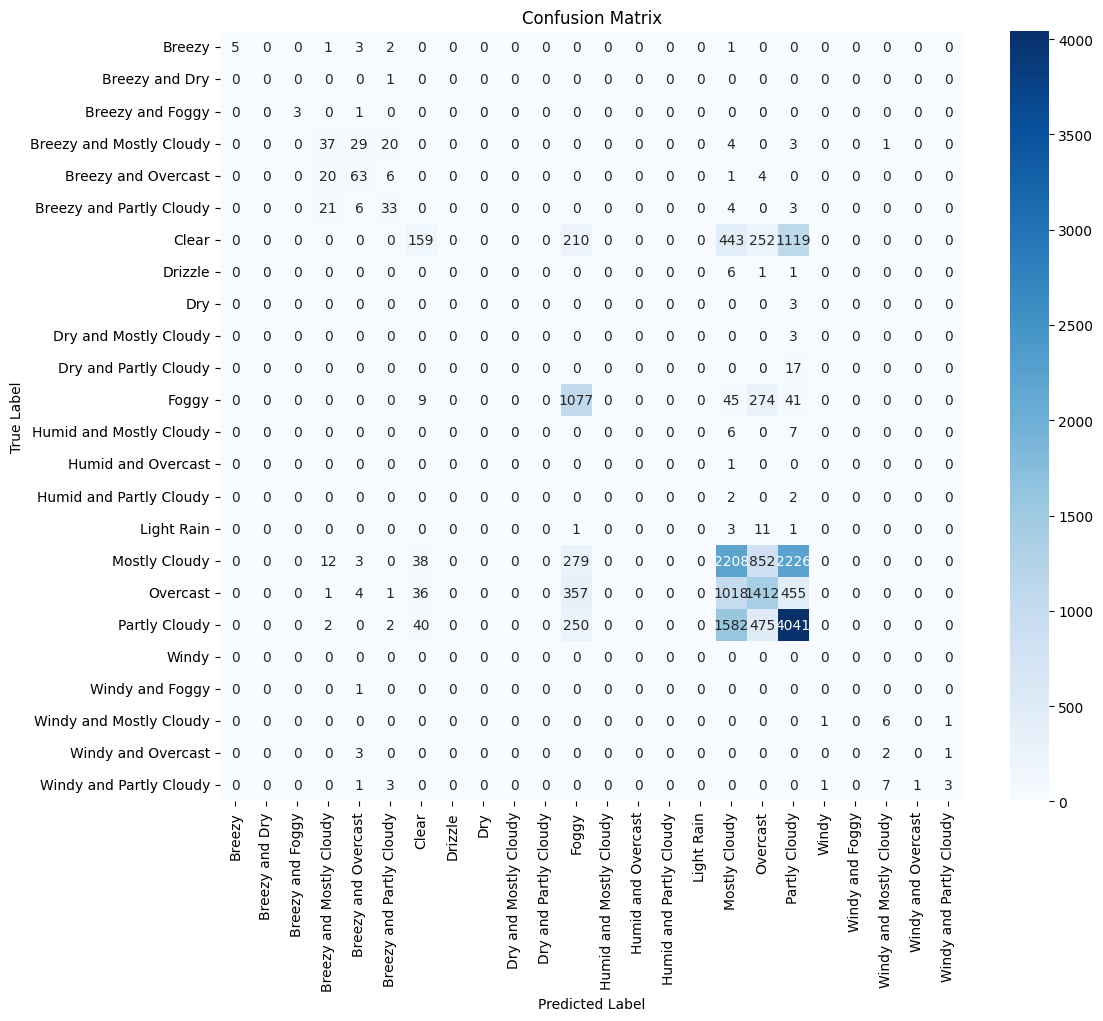

In [8]:
#EVALUATE MODEL
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

unique_labels = np.unique(np.concatenate((y_true_labels, y_pred_labels)))
target_names = [le.classes_[i] for i in unique_labels]

print("\nClassification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, labels=unique_labels, target_names=target_names, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=unique_labels)
plt.figure(figsize=(12, 10)) # Increased figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

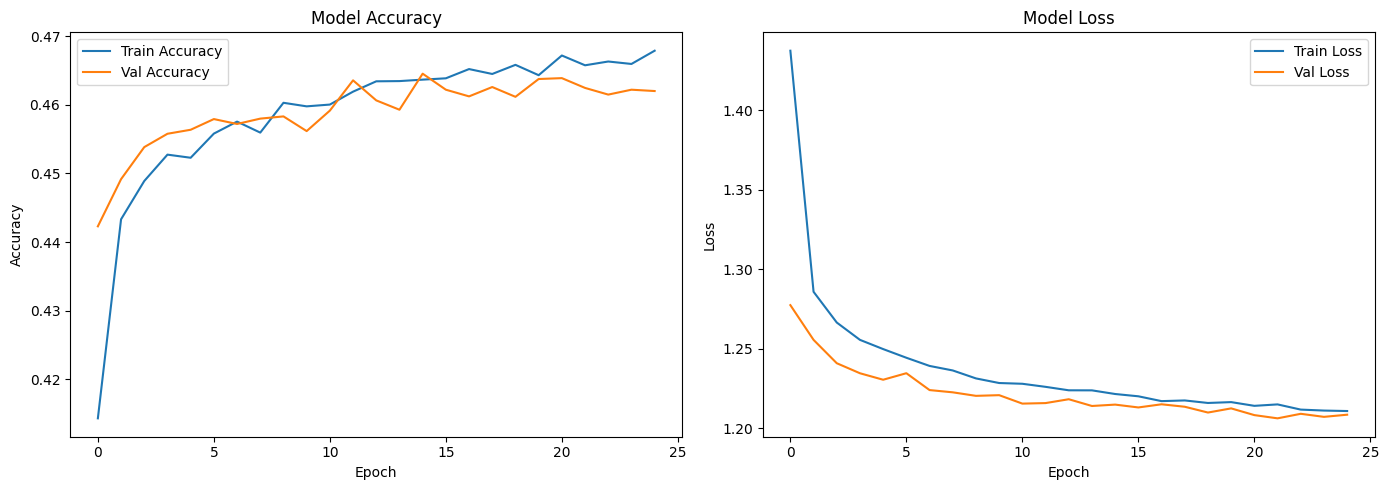

In [9]:
#PLOT ACCURACY & LOSS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()



In [10]:
#SAVE MODEL
os.makedirs("model", exist_ok=True)
model.save("model/weather_pattern_model.keras")
print("\n✅ Model saved as 'model/weather_pattern_model.keras'")


✅ Model saved as 'model/weather_pattern_model.keras'


In [11]:
#User input(prediction code)
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model

#Load Model & Tools
model = load_model('model/weather_pattern_model.keras')
scaler = pickle.load(open('scaler.pkl', 'rb'))
le = pickle.load(open('label_encoder.pkl', 'rb'))

#Take Input
try:
    temperature = float(input(" Temperature (°C): "))
    humidity = float(input(" Humidity (0–1): "))
    wind_speed = float(input(" Wind Speed (km/h): "))
    pressure = float(input(" Pressure (millibars): "))
except ValueError:
    print(" Please enter valid numbers.")
    exit()

#Prepare Input
input_df = pd.DataFrame([{
    'Temperature (C)': temperature,
    'Humidity': humidity,
    'Wind Speed (km/h)': wind_speed,
    'Pressure (millibars)': pressure
}])

scaled_input = scaler.transform(input_df)
prediction = model.predict(scaled_input)
predicted_class = le.inverse_transform([np.argmax(prediction)])

#Show Output
print("\n Input Features:")
print(input_df)
print(f"\n Predicted Weather Summary: **{predicted_class[0]}**\n")


 Temperature (°C): 45
 Humidity (0–1): 1
 Wind Speed (km/h): 100
 Pressure (millibars): 300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

 Input Features:
   Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)
0             45.0       1.0              100.0                 300.0

 Predicted Weather Summary: **Windy and Mostly Cloudy**

